# Part 4: Google+ Network

In [2]:
library(igraph)
path <- "../gplus/"
circlesFiles <- list.files(path, pattern="*.circles", full.names=FALSE)
nodeIndex <- strsplit(circlesFiles, ".circles")

### Question 18:

In [11]:
g_new <- list()
circle <- list()
fitIndex <- 1
interestIndex <- list()
interestID_org <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")
interestID <- list()

for(i in 1:length(nodeIndex)){

    circlesFile <- paste(path, nodeIndex[[i]], ".circles", sep="")
    fileConnection <- file(circlesFile, open="r")
    lines <- readLines(fileConnection)
    close(fileConnection)

    circles <- strsplit(lines, "\t")
    if(length(circles) > 2){
        if(any(interestID_org == nodeIndex[[i]])){
            interestIndex <- c(interestIndex, fitIndex)
            interestID <- c(interestID, nodeIndex[[i]])
        }
        edgeFile <- paste(path, nodeIndex[[i]], ".edges", sep="")
        g_noEgo <- read.graph(edgeFile, format="ncol", directed=TRUE)
        g_noEgo <- g_noEgo + vertex(nodeIndex[[i]], color="black")
        g_noEgo[vcount(g_noEgo), 1:(vcount(g_noEgo)-1)] <- 1
        g_new[[fitIndex]] <- g_noEgo
        circle[[fitIndex]] <- circles
        fitIndex <- fitIndex + 1
    }
}


printInfo <- sprintf("Number of such personal networks: %d\n", fitIndex)
cat(printInfo)

Number of such personal networks: 58


### Question 19:

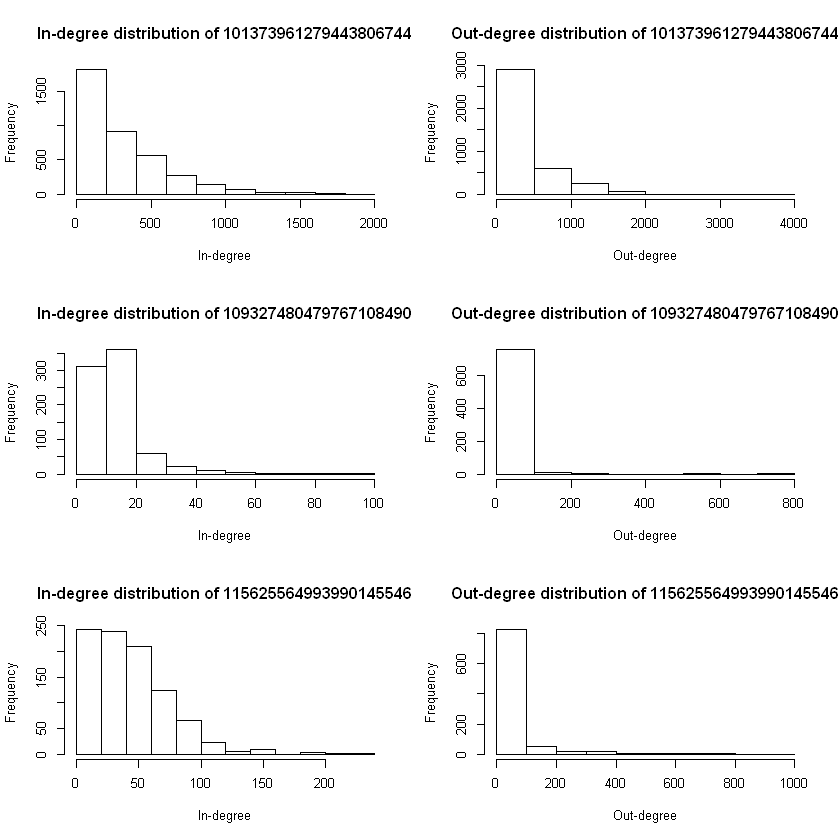

In [14]:
par(mfrow=c(3, 2))


for(i in 1:length(interestID)){
    title <- sprintf("In-degree distribution of %s", interestID[[i]])
    deg_in <- degree(g_new[[interestIndex[[i]]]], mode = c("in"))
    hist(deg_in, main=title, xlab="In-degree")

    title <- sprintf("Out-degree distribution of %s", interestID[[i]])
    deg_out <- degree(g_new[[interestIndex[[i]]]], mode = c("out"))
    hist(deg_out, main=title, xlab="Out-degree")
}

### Question 20:

In [15]:
walk_c <- list()
mscore <- list()
for(i in 1:length(interestID)){
    walk_c[[i]] <- walktrap.community(g_new[[interestIndex[[i]]]], modularity = TRUE)
    mscore[[i]] <- modularity(g_new[[interestIndex[[i]]]], walk_c[[i]]$membership)
}

Modularity score of 101373961279443806744: 0.191090
Modularity score of 109327480479767108490: 0.252765
Modularity score of 115625564993990145546: 0.319473


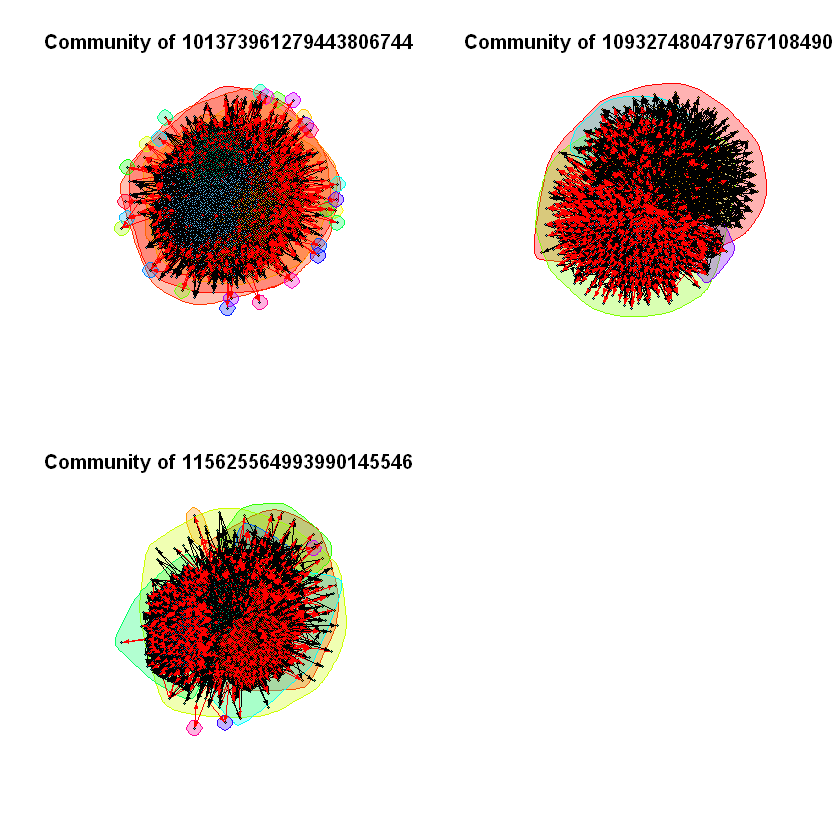

In [16]:
for(i in 1:length(interestID)){
    printInfo <- sprintf("Modularity score of %s: %f\n", interestID[[i]], mscore[[i]])
    cat(printInfo)
}

par(mfrow=c(2, 2))
for(i in 1:length(interestID)){
    title <- sprintf("Community of %s", interestID[[i]])
    plot(walk_c[[i]], g_new[[interestIndex[[i]]]], vertex.label=NA, vertex.size=3, edge.arrow.size=0.2, layout=layout.lgl, main=title)
}

### Question 22:

In [20]:
for(i in 1:length(interestIndex)){
    idx <- interestIndex[[i]]
    H_C <- 0
    H_K <- 0
    H_CK <- 0
    H_KC <- 0
    
    unique_circleNodes <- list()
    for(i1 in 1:length(circle[[idx]])){
        circleNode <- circle[[idx]][[i1]]
        for(i2 in 2:length(circleNode)){
            unique_circleNodes <- c(unique_circleNodes, circleNode[[i2]])
        }
    }
    unique_circleNodes <- unique(unique_circleNodes)
    N <- length(unique_circleNodes)
#     print(N)
#     print(vcount(g_new[[idx]]))

    
    flag_H_C <- FALSE
    for(k in 1:length(sizes(walk_c[[i]]))){
        communityNode <- (walk_c[[i]])$names[which(walk_c[[i]]$membership==k)]
        B <- length(intersect(communityNode, unique_circleNodes))
        if(B != 0){
            H_K <- H_K - (B/N) * log2(B/N)
        }
        for(c in 1:length(circle[[idx]])){
            circleNode <- circle[[idx]][[c]]
            C_CK <- length(intersect(communityNode, circleNode))
            if(flag_H_C == FALSE){
                A <- length(circleNode) - 1
                H_C <- H_C - (A/N) * log2(A/N)
            }
            if(C_CK != 0){
                H_CK <- H_CK - (C_CK/N) * log2(C_CK/B)
            }
        }
        flag_H_C <- TRUE
    }

    for(c in 1:length(circle[[idx]])){
        circleNode <- circle[[idx]][[c]]
        A <- length(circleNode) - 1
#         print(A)
        for(k in 1:length(sizes(walk_c[[i]]))){
            communityNode <- (walk_c[[i]])$names[which(walk_c[[i]]$membership==k)]
            C_KC <- length(intersect(communityNode, circleNode))
            if(C_KC != 0){
                H_KC <- H_KC - (C_KC/N) * log2(C_KC/A)
            }
        }
    }

    homogeneity <- 1 - (H_CK / H_C)
    completeness <- 1 - (H_KC / H_K)

    printInfo <- sprintf("%s: homogeneity=%f, completeness=%f\n", interestID[[i]], homogeneity, completeness)
    cat(printInfo)
}

101373961279443806744: homogeneity=0.003867, completeness=-1.504238
109327480479767108490: homogeneity=0.851885, completeness=0.329874
115625564993990145546: homogeneity=0.451890, completeness=-3.423962
